# 图像平滑
图像平滑主要用于模糊处理和降低噪声，滤波和模糊他们都属于卷积，不同滤波方法之间只是卷积核不同（对线性滤波而言），低通滤波器是模糊，高通滤
波器是锐化。


 低通低通滤波器就是允许低频信号通过，在图像中边缘和噪点都相当于高 部分，所以低通滤波器用于去除噪点、平滑和模糊图像。高通滤波器则反之，用 来增强图像边缘，进行锐化处理。

## 卷积基础
![](images/2023-08-11-15-44-04.png)

卷积就是循环对图像跟卷积核逐个元素相乘再求和得到另外一副图像的操作，比如上图中的结果图中的第一个元素 5 计算方法为：

**5 = 1×1 + 2×0 + 1×0 + 0×0 + 1×0 + 1×0 + 3×0 + 0×0 + 2×2**

计算完之后，整个框会右移一步继续计算。

![](images/2023-08-11-15-44-40.png)

![](images/2023-08-11-15-45-07.png)

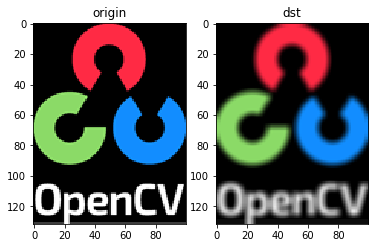

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("exp_images/logo.png")
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121);plt.imshow(img[:,:,::-1]),plt.title("origin")
plt.subplot(122);plt.imshow(dst[:,:,::-1]),plt.title("dst")
plt.show()

可以看到这个核对图像进行了模糊处理，这是卷积的众多功能之一。当然卷积还有很多知识没有学到，后面我们再继续深入。

## 均值滤波
均值滤波是一种简单的滤波处理，它取的是卷积核区域内元素的均值，通过将图像与归一化（数据范围在 0-1 之间）过滤核进行卷积来完成的。它会获取内核区域下的所有像素平均值，并替换中心元素。这是同过 cv.blur()或 cv.boxFiler()完成的。

![](images/2023-08-11-15-45-33.png)

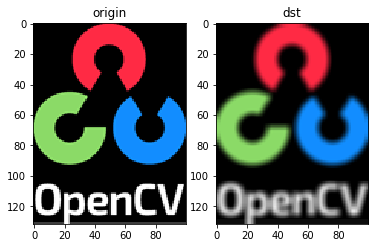

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("exp_images/logo.png")
blur = cv.blur(img,(5,5))

plt.subplot(121);plt.imshow(img[:,:,::-1]),plt.title("origin")
plt.subplot(122);plt.imshow(blur[:,:,::-1]),plt.title("dst")
plt.show()

均值滤波不能很好的保护图像细节，在图像区噪的同时也破坏了图像的细节部分，从而使图像变得模糊，不能很好的去除噪声点，特别是椒盐噪声。

## 方框滤波
方框滤波和均值滤波不同的是，方框滤波不会计算像素的均值，而是计算邻域像素之和。

![](images/2023-08-11-15-45-50.png)

以 5x5 卷积核为例，计算邻域像素之和。

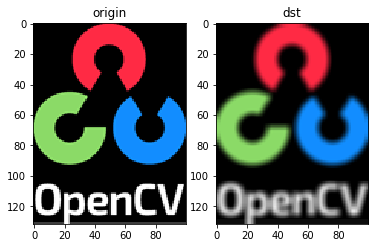

In [25]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("exp_images/logo.png")
blur = cv.boxFilter(img,-1,(5,5))

plt.subplot(121);plt.imshow(img[:,:,::-1]),plt.title("origin")
plt.subplot(122);plt.imshow(blur[:,:,::-1]),plt.title("dst")
plt.show()

## 高斯滤波
均值滤波和方框滤波中的每个值都一样，也就是说图像区域中的每个像素的权重一样。高斯滤波的卷积核权重值呈正态分布。

![](images/2023-08-11-15-46-06.png)


OpenCV 中高斯滤波使用函数 cv.GaussianBlur()完成。

![](images/2023-08-11-15-46-22.png)

其中 sigmaX 越大，模糊效果模糊效果。高斯滤波可以有效相比均值滤波效率要慢，但可以有效的消除高斯噪声，等保留更多的细节。 

参考下列程序，可以看到均值滤波损失的细节会更多。

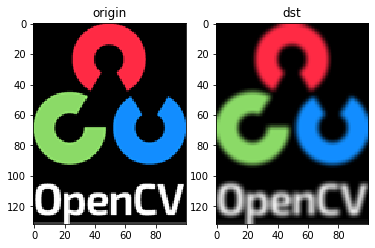

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("exp_images/logo.png")
gaussian = cv.GaussianBlur(img,(5,5),2)

plt.subplot(121);plt.imshow(img[:,:,::-1]),plt.title("origin")
plt.subplot(122);plt.imshow(gaussian[:,:,::-1]),plt.title("dst")
plt.show()

## 中值滤波
函数cv.medianBlur()采用核区域下所有像素的中位数，并将中心元素替换为此中值。中值滤波与前面不一样的是，中心元素是计算出的值，可能是图像中的像素值或新值。这个滤波器经常用来处理椒盐噪声。

![](images/2023-08-11-15-46-36.png)

下图为一副椒盐噪声图通过均值滤波和中值滤波的处理结果

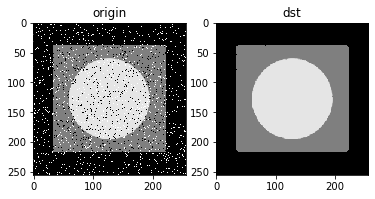

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("exp_images/salt-pepper-noise.tif")
median = cv.medianBlur(img,5)

plt.subplot(121);plt.imshow(img[:,:,::-1]),plt.title("origin")
plt.subplot(122);plt.imshow(median[:,:,::-1]),plt.title("dst")
plt.show()

## 双边滤波
cv.bilateralFilter()在去除噪声方面非常有效，同时保持边缘清晰。但与其他滤波相比，操作速度较慢。前面的模糊操作都会损失掉图像细节信息，图像的边缘信息很难保存下来。然而，边缘信息是图像中很重要的一个特征，所以有了双边滤波。

![](images/2023-08-11-16-39-32.png)

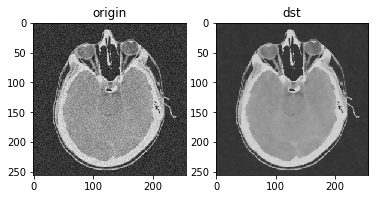

In [59]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("exp_images/a.tif")
blur = cv.bilateralFilter(img,9,75,75)

plt.subplot(121);plt.imshow(img[:,:,::-1]),plt.title("origin")
plt.subplot(122);plt.imshow(blur[:,:,::-1]),plt.title("dst")
plt.show()